The current Jupyter notebook applies Qiskit to dense hacking coding simulation, illustrating functional quantum programming in Python, using Qiskit to automate the dense coding process and to explore a cyberattack to dense coding communications. In this case, depending on the string to be sent, the Python program automates the process of circuit design, for both Alice and Bob. While Bob has a fixed set of operations, Alice's operations depend upon the bit string being sent.

Now, besides Alice and Bob, we simulate a situation in which Eve has compromised Alice, without Alice knowing it, Eve's quantum malware is capable of changing the quantum information sent from Alice to Bob, compromising the final results. We use Qiskit to simulate both the standard quantum dense coding and Eve's quantum malware attack.

The simulation addresses a future context where the users of future quantum technologies do not "see" the translation from their high-level interaction with devices to the quantum machine language, rather, there is, in this scenario, an automation process that bridges the high-level user interface to the adaptive quantum circuit design and implementation, a process that may become feasible, for instance, in the future, with Python programming integrating in Qiskit, Graphical User Interface (GUI) design and interactions with a future quantum Internet.

Hackers who are trained in quantum computation and communications may design malware that is targeted at the automated bridge between the user interface and adaptive quantum circuit design for running things on the quantum substrate, it is at this level that quantum malware enters into play, in the sense that a hacker may target the automated bridge and change the circuit design response with specific quantum gate sequences that may change the results of quantum computations and communications. Depending on the type of applications, the users may realize what has happened immediately or may take some time realizing it, which can have disruptive effects for quantum computing systems and quantum communications.

The present notebook addresses this problem with an example of quantum malware, using Qiskit, further reflection is provided in the article "Quantum Malware: Hacking Quantum Dense Coding" (https://qexperiments.blogspot.com/2020/07/quantum-malware-hacking-quantum-dense.html).

The first step is to import the main modules:

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

The next step is to define the main functions that automate the circuit design, for simulation on IBM's quantum computers. Here we have the dense coding circuit function that prepares the initial configuration and sets up the simulation of Alice and Bob's automated communication circuit setup.

In the case of dense coding, Alice and Bob initially share an entangled pair:

$ |Alice+Bob>_0 = (|00> + |11>) / sqrt(2) $

In the hypothetical future scenario that we are simulating, by taking advantage of entanglement, Alice can interact with her terminal setting the message that she wants to send which will automatically be encoded into one of the four alternate bit strings {00,01,10,11}, then, the system's automated quantum circuit design will define the appropriate gate sequence on Alice's endpoint following the quantum dense coding algorithm, after the appropriate operations are performed on Alice's qubit, the qubit is sent to Bob's terminal whose automated system also applies an appropriate sequence of gates that follow the quantum dense coding algorithm.

Following the dense coding communication protocol, what changes for each bit string is the sequence of operations on Alice's terminal, at Bob's endpoint, once Alice's qubit is received the sequence is always the same, that is, a CNOT gate is applied taking Alice's qubit as the control, and then a Haddamard transform is applied on Alice's qubit.

Now, if Eve has installed quantum malware on Alice's interface so that Alice's automated program, that translates her message to the corresponding sequence of quantum gates,has been corrupted by Eve, then, the message will be changed.

In this case, Eve's goal is not to eavesdrop on the communication but actually disrupt it, which means that as soon as the malware is activated Alice will unknowingly start sending the wrong messages to Bob. 

The malware attacks Alice's automated quantum operations by always adding a single Z gate operation at the end of Alice's automated circuit design , so that when the automated system sends Alice's qubit to Bob's terminal for the further automated transformations on Bob's end, the Z gate operation will effectively lead to a disruption of the received message, we discuss this process in some detail in the Blog post: 


The current notebook integrated software is aimed at simulating the above scenario as well as the standard quantum dense coding protocol using two Python functions:


"dense_coding_circuit": this function takes as input the bit string, the backend for running the simulation and a binary option called eve, that, if set to False sets up the circuit for the standard quantum dense coding and, if set to True, sets up the circuit for the dense coding with the quantum malware attack, the function returns the circuit and the corresponding device for running the simulation.

"run_circuit": the run circuit function runs the simulation on the corresponding IBM's Q Experience device, taking as inputs the circuit, the device and the number of shots.



In [3]:
# Setup the circuit function
def dense_coding_circuit(bitstring, # bit string to be sent
                         backend='qasm_simulator', # backend to be used, default is set to 'qasm_simulator'
                         eve=False # if Eve's malware is activated, the quantum malware attack takes place
                         ):
    
    # Get backend
    
    if backend == 'qasm_simulator':
        device = Aer.get_backend(backend) # use Aer if the backend is the 'qasm_simulator' (default)
    else:
        device = provider.get_backend(backend) # use the provider otherwise

    # Quantum circuit to simulate the communication process
    
    Alice = QuantumRegister(1,'alice') # Alice's Quantum Register
    Bob = QuantumRegister(1,'bob') # Bob's Quantum Register
    cr = ClassicalRegister(2,'c') # classical registers (we need two of them, and they belong to Bob)
    
    circuit = QuantumCircuit() # quantum circuit (initially empty)
    circuit.add_register(Alice) # add Alice's quantum register to the quantum circuit
    circuit.add_register(Bob) # add Bob's quantum register to the quantum circuit
    circuit.add_register(cr) # add the two classical registers for measurement
    
    # Initial circuit preparation stage: Alice and Bob initially share an entangled pair
    circuit.h(Alice) # apply a Haddamard transform to Alice's qubit
    circuit.cx(Alice,Bob) # apply a CNOT gate that effectively leads to the entangled pair
    circuit.barrier([Alice,Bob]) # barrier is setup to separate the preparation stage
    
    # Now the quantum dense coding protocol is simulated
       
    # If the bit string is 00:
    if bitstring == '00':
        # If Eve is on then the quantum malware attack simulation is run
        if eve == True:
            circuit.z(Alice) # Eve's quantum malware transforms Alice's qubit without Alice realizing it
            circuit.barrier([Alice,Bob]) # we use a barrier to separate Bob's stage
        # Alice's device sends her qubit to Bob whose automated device applies the following operations:
        circuit.cx(Alice,Bob) # CNOT using Alice's qubit for control
        circuit.h(Alice) # Haddamard transform on Alice's qubit
    
    # If the bit string is 10:
    elif bitstring == '10':
        # Alice's system applies an X gate to her qubit
        circuit.x(Alice)
        # If Eve is on then the quantum malware attack simulation is run
        if eve == True:
            circuit.z(Alice) # Eve's quantum malware transforms Alice's qubit without Alice realizing it
        circuit.barrier([Alice,Bob]) # we use a barrier to separate Alice's stage from Bob
        # Alice's device sends her qubit to Bob whose automated device applies the following operations:
        circuit.cx(Alice,Bob) # CNOT using Alice's qubit for control
        circuit.h(Alice) # Haddamard transform on Alice's qubit
        
    elif bitstring == '01':
        # Alice applies a Z gate to her qubit
        circuit.z(Alice)
        # If Eve is on then the quantum malware attack simulation is run
        if eve == True:
            circuit.z(Alice) # Eve's quantum malware transforms Alice's qubit without Alice realizing it
        circuit.barrier([Alice,Bob])
        # Alice's device sends her qubit to Bob whose automated device applies the following operations:
        circuit.cx(Alice,Bob) # CNOT using Alice's qubit for control
        circuit.h(Alice) # Haddamard transform on Alice's qubit
        
    else:
        # Alice applies an X gate followed by a Z gate to her qubit
        circuit.x(Alice)
        circuit.z(Alice)
        # If Eve is on then the quantum malware attack simulation is run
        if eve == True:
            circuit.z(Alice) # Eve's quantum malware transforms Alice's qubit without Alice realizing it
        circuit.barrier([Alice,Bob])
        # Alice's device sends her qubit to Bob whose automated device applies the following operations:
        circuit.cx(Alice,Bob) # CNOT using Alice's qubit for control
        circuit.h(Alice) # Haddamard transform on Alice's qubit
    
    # Bob's system measures the qubit he received from Alice and his own qubit
    circuit.barrier([Alice,Bob])
    circuit.measure(Alice, cr[0])
    circuit.measure(Bob, cr[1])
    
    # The Python function returns the circuit and the device for simulation
    return circuit, device
    
def run_circuit(circuit,device,num_shots=1000):
    # Execute the circuit on the device for the number of shots defined
    job = execute(circuit, device, shots=num_shots)
    
    # Get the simulation results for the repeated experiments
    result = job.result()
    
    # Extract the counts, print them and return them for further processing
    counts = result.get_counts(circuit)
    print(counts)
    return counts

The next cell sets the simulation circuit, without hacking, for the bitstring '00' and draws it.

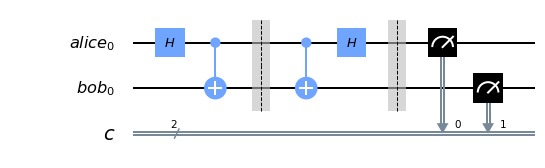

In [3]:
circuit, device = dense_coding_circuit(bitstring='00')
circuit.draw()

Now we run the circuit on the 'qasm_simulator'.

{'00': 1000}


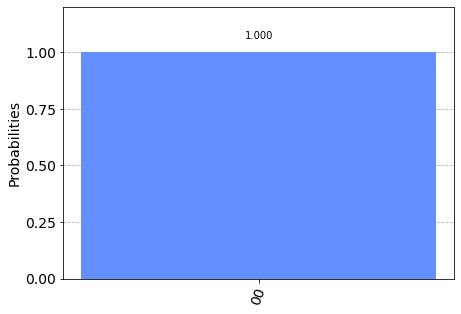

In [6]:
counts = run_circuit(circuit,device)
plot_histogram(counts)

As expected the result is equal to '00'. Now let us run the circuit on an actual quantum device, in this case we use 'ibmq_london'.

{'11': 63, '00': 7858, '01': 85, '10': 186}


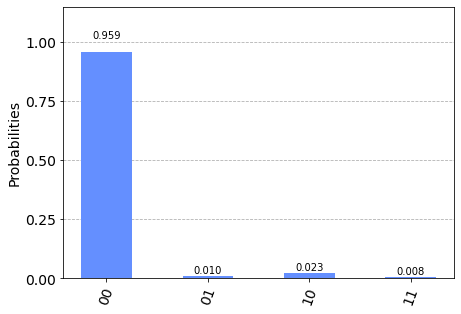

In [7]:
circuit, device = dense_coding_circuit(bitstring='00',backend='ibmq_london')

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

We can see that the expected result '00' is obtained, with a frequency 0.959. Now let us see the effects of turning on the malware.

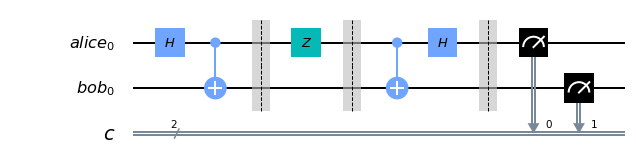

In [10]:
circuit, device = dense_coding_circuit(bitstring='00',eve=True)
circuit.draw()

As we can see, the malware is activated as a Z gate transformation in the circuit. Eve compromised Alice's system without Alice knowning, thus, without Alice realizing it the Z gate is applied whenever Alice sends her qubit, without the Alice knowing it. Let us now run this circuit on the simulator:

{'01': 8192}


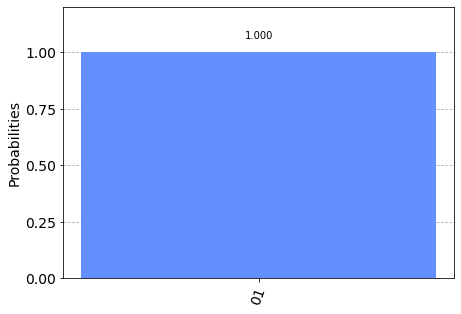

In [4]:
circuit, device = dense_coding_circuit(bitstring='00',eve=True)

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

The result of the malware was to change the intended bit string '00' to the value '01'.

If we run the circuit on the 'ibmq_london' device, the activated quantum malware, we get the following results:

{'11': 171, '00': 432, '01': 7548, '10': 41}


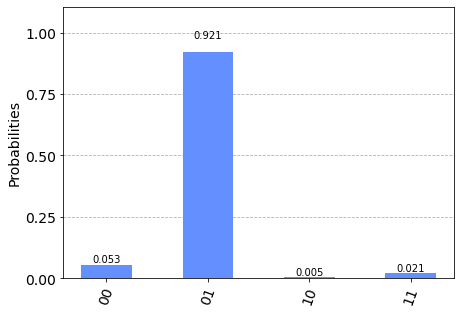

In [12]:
circuit, device = dense_coding_circuit(bitstring='00',backend='ibmq_london',eve=True)

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

As can be seen from the above results, Eve managed to change the dominant result from '00' to '01', disrupting the quantum communication through her quantum malware attack. The results different from '01' correspond to the innevitable quantum noise present in the actual device that was not present in the simulator.

Let us now simulate the other alternative bitstring '10' on the 'ibmq_london' device, without malware.

{'11': 116, '00': 779, '01': 69, '10': 7228}


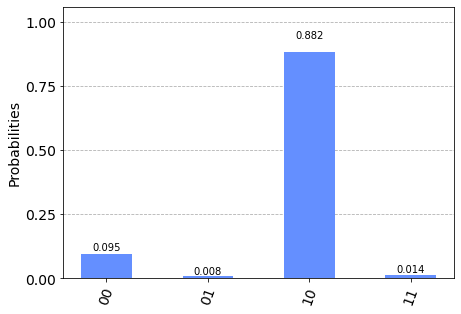

In [13]:
circuit, device = dense_coding_circuit(bitstring='10',backend='ibmq_london')

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

As expected without malware the dominant frequency with a high value is '10', the (low probability) deviations resulting from noise. Now, activating the malware and using the same quantum computer to run our simulation we get the following results:

{'11': 6900, '00': 110, '01': 764, '10': 418}


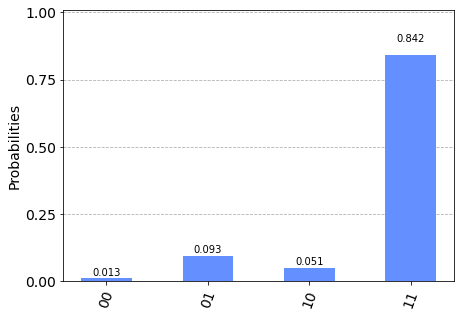

In [14]:
circuit, device = dense_coding_circuit(bitstring='10',backend='ibmq_london',eve=True)

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

Again, as expected, the malware changed the profile, the dominant frequency is now '11', with the low probability deviations resulting from noise.

Let us now run the case '01' without the malware.

{'11': 174, '00': 489, '01': 7470, '10': 59}


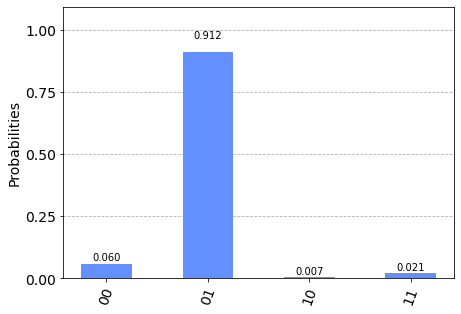

In [15]:
circuit, device = dense_coding_circuit(bitstring='01',backend='ibmq_london')

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

As expected, the dominant frequency is '01', with low-probability deviations resulting from noise. If Eve's quantum malware attack is turned on, then, running the simulation on 'ibmq_london', leads to a dominant result of '00'.

{'11': 59, '00': 7858, '01': 121, '10': 154}


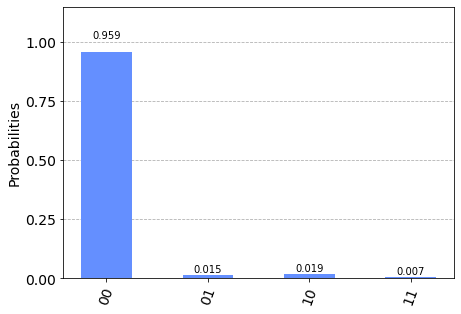

In [16]:
circuit, device = dense_coding_circuit(bitstring='01',backend='ibmq_london',eve=True)

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

Running now the last alternative, which is the case where the string to be communicated is '11', we get the expected result '11' on 'ibmq_london', which is changed to '10' when we run the circuit with the quantum malware attack turned on, as shown in the following two cells.

{'11': 6841, '00': 99, '01': 746, '10': 506}


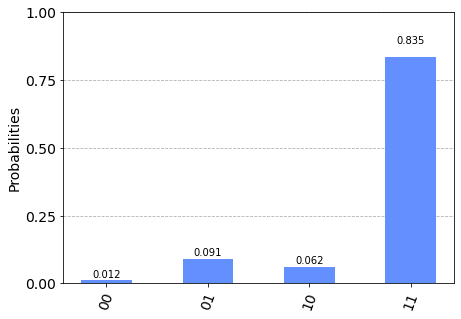

In [17]:
circuit, device = dense_coding_circuit(bitstring='11',backend='ibmq_london')

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

{'11': 131, '00': 710, '01': 57, '10': 7294}


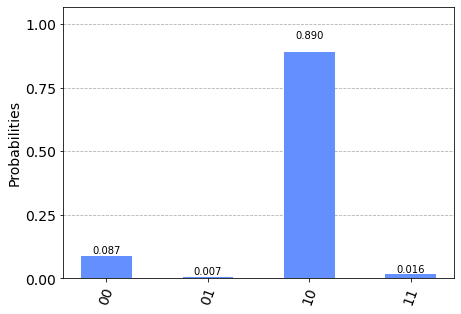

In [18]:
circuit, device = dense_coding_circuit(bitstring='11',backend='ibmq_london',eve=True)

counts = run_circuit(circuit,device,num_shots=8192)

plot_histogram(counts)

The following cells contain the circuits without the malware for the cases where '10', '01' and '11'. In each of these circuits, the gates before the first barrier represent the preparation of the initial entangled pair, the gates between the first and second barrier correspond to Alice's operations before sending the qubit to Bob, the gates between the second a the third barrier correspond to Bob's qubits.

Looking at these circuits and also at the circuit for '00', previously represented, we can see that Bob always does the same operation, which means that the difference between each circuit result from Alice's original operations on her qubit.

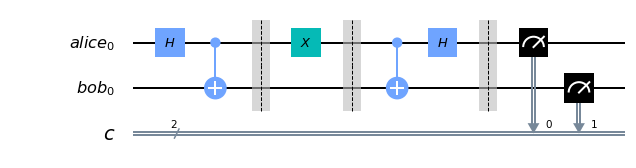

In [4]:
circuit, device = dense_coding_circuit(bitstring='10')
circuit.draw()

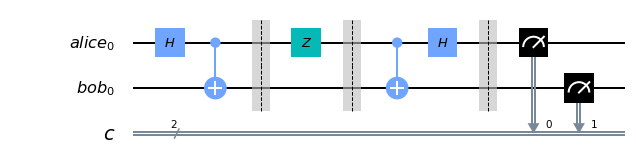

In [5]:
circuit, device = dense_coding_circuit(bitstring='01')
circuit.draw()

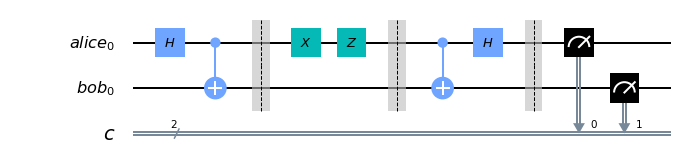

In [6]:
circuit, device = dense_coding_circuit(bitstring='11')
circuit.draw()

We now show the circuits with the quantum malware, which takes the form of a final operation after Alice's device has transformed her qubit. This operation does not require Eve to eavesdrop on the contents of Alice's qubit, which means that Eve is trying to disrupt the channel but not to eavesdrop, in this case, Eve's quantum malware just has to implement the same gate in each case to corrupt the channel, this is the Z gate at the end of each of Alice's actions.

In the hypothetical future scenario that is being simulated, Alice, of course, does not know that Eve has breached Alice's system and installed malware. In this game, Alice just types in the message which is converted in the intended string which is then automatically dealt with at her terminal's end by the quantum coding program that adaptively sets up the gates, on Bob's end the circuit is also automated and processes the message performing the required actions without Bob's intervention, all this is running in the background, unless Bob realizes something is wrong and communicates with Alice, the problem will remain, that is, the quantum dense coding protocol is no longer working properly, as intended by Eve.

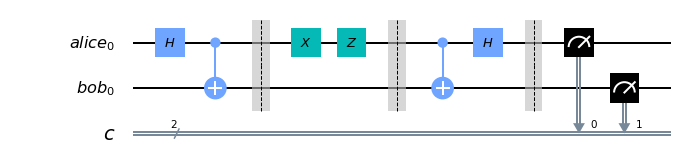

In [7]:
circuit, device = dense_coding_circuit(bitstring='10',eve=True)
circuit.draw()

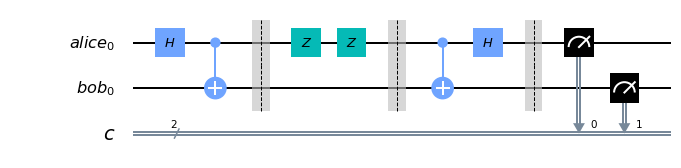

In [8]:
circuit, device = dense_coding_circuit(bitstring='01',eve=True)
circuit.draw()

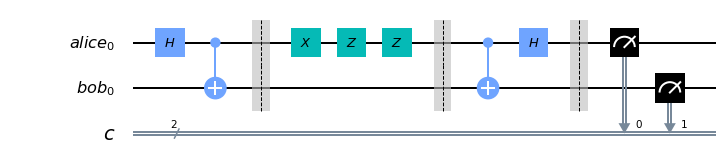

In [9]:
circuit, device = dense_coding_circuit(bitstring='11',eve=True)
circuit.draw()